In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f

In [2]:
file_path = "../data/Raw Data_GeneSpring.txt"

# Read the text file into a DataFrame
df = pd.read_csv(file_path, sep='\t')  # Change '\t' to your desired delimiter if needed

In [4]:
df.head()

,ProbeName,GSM1149106_M_Ns3.txt:gProcessedSignal(normalized),GSM1149107_M_Ns4.txt:gProcessedSignal(normalized),GSM1149108_M_Ns5.txt:gProcessedSignal(normalized),GSM1149109_M_Ns6.txt:gProcessedSignal(normalized),GSM1149110_M_Ns7.txt:gProcessedSignal(normalized),GSM1149111_M_Ns8.txt:gProcessedSignal(normalized),GSM1149112_M_Ns9.txt:gProcessedSignal(normalized),GSM1149113_M_Ns10.txt:gProcessedSignal(normalized),GSM1149114_M_Ns11.txt:gProcessedSignal(normalized),...,GSM1149147_F_Sm6.txt:gProcessedSignal(normalized),GSM1149148_F_Sm7.txt:gProcessedSignal(normalized),GSM1149149_F_Sm8.txt:gProcessedSignal(normalized),GSM1149150_F_Sm9.txt:gProcessedSignal(normalized),GSM1149151_F_Sm10.txt:gProcessedSignal(normalized),GSM1149152_F_Sm11.txt:gProcessedSignal(normalized),GSM1149153_F_Sm12.txt:gProcessedSignal(normalized),GeneSymbol,EntrezGeneID,Go
0,GE_BrightCorner,17.288560,18.103434,18.280110,17.883734,17.879555,17.340961,16.226210,16.203045,15.940904,...,16.039999,15.783204,14.843888,15.553449,15.912829,15.604271,16.120403,NaN,NaN,NaN
1,DarkCorner,2.172766,0.075925,0.232402,0.052573,0.483300,0.240482,0.327676,0.041980,0.015175,...,0.232663,0.023183,0.104347,0.055785,0.141535,0.113465,0.592137,NaN,NaN,NaN
2,A_24_P66027,11.954556,11.681619,11.831579,12.262896,11.233925,11.722222,11.582652,13.039122,12.615288,...,12.446932,12.315217,11.945836,11.924950,13.129469,12.378983,13.259206,APOBEC3B,9582.0,GO:0051607|GO:0047844|GO:0045087|GO:0008152|GO...
3,A_32_P77178,6.224496,6.963845,7.096990,7.319873,6.611215,6.760409,7.810502,8.377619,8.169108,...,7.813999,7.763040,7.712591,7.165883,8.364161,6.885972,9.458718,NaN,NaN,NaN
4,A_23_P212522,9.328137,9.164498,8.934509,9.166321,9.175541,8.810351,10.665818,10.681737,10.359045,...,10.240832,9.757538,9.847317,9.931273,10.160020,10.282162,11.035402,ATP11B,23200.0,GO:0005515|GO:0000287|GO:0005794|GO:0005886|GO...


In [3]:
df.columns

Index(['ProbeName', 'GSM1149106_M_Ns3.txt:gProcessedSignal(normalized)',
       'GSM1149107_M_Ns4.txt:gProcessedSignal(normalized)',
       'GSM1149108_M_Ns5.txt:gProcessedSignal(normalized)',
       'GSM1149109_M_Ns6.txt:gProcessedSignal(normalized)',
       'GSM1149110_M_Ns7.txt:gProcessedSignal(normalized)',
       'GSM1149111_M_Ns8.txt:gProcessedSignal(normalized)',
       'GSM1149112_M_Ns9.txt:gProcessedSignal(normalized)',
       'GSM1149113_M_Ns10.txt:gProcessedSignal(normalized)',
       'GSM1149114_M_Ns11.txt:gProcessedSignal(normalized)',
       'GSM1149115_M_Ns12.txt:gProcessedSignal(normalized)',
       'GSM1149116_M_Ns13.txt:gProcessedSignal(normalized)',
       'GSM1149117_M_Ns14.txt:gProcessedSignal(normalized)',
       'GSM1149118_M_Sm1.txt:gProcessedSignal(normalized)',
       'GSM1149119_M_Sm2.txt:gProcessedSignal(normalized)',
       'GSM1149120_M_Sm3.txt:gProcessedSignal(normalized)',
       'GSM1149121_M_Sm4.txt:gProcessedSignal(normalized)',
       'GSM1149122_M_S

In [10]:
data = df.iloc[:,1:49].values

# MNS MS FNS FS

In [11]:
data.shape

(41093, 48)

In [21]:
# Define the number of rows (48)
num_rows = 48

# Create matrix N (48x4)
N = np.zeros((num_rows, 4), dtype=int)

# Define the column indices for each combination
male_non_smoker = slice(0, 12)  # Male, Non-Smoker
male_smoker = slice(12, 24)     # Male, Smoker
female_non_smoker = slice(24, 36)  # Female, Non-Smoker
female_smoker = slice(36, 48)     # Female, Smoker

# Set values in matrix N for the corresponding combinations
N[male_non_smoker, [0, 2]] = 1      # Male, Non-Smoker (columns 0 and 2)
N[male_smoker, [0, 3]] = 1         # Male, Smoker (columns 0 and 3)
N[female_non_smoker, [1, 2]] = 1   # Female, Non-Smoker (columns 1 and 2)
N[female_smoker, [1, 3]] = 1       # Female, Smoker (columns 1 and 3)

# Create matrix D (48x4)
D = np.zeros((num_rows, 4), dtype=int)

# Set values in matrix D for the corresponding combinations
D[male_non_smoker, 0] = 1  # M-NS
D[male_smoker, 1] = 1     # M-S
D[female_non_smoker, 2] = 1  # F-NS
D[female_smoker, 3] = 1      # F-S

In [22]:
num_A = np.eye(48) - N @ np.linalg.pinv(N.T @ N) @ N.T
num_B = np.eye(48) - D @ np.linalg.pinv(D.T @ D) @ D.T


In [48]:
def f_stat(x):
    num = x.T @ num_A @ x
    den = x.T @ num_B @ x
    if den[0] == 0:
        return None  
    f_s = (num/den - 1) * 44.0
    return 1 - f.cdf(f_s, 1, 44)

In [49]:
p_values = []

In [50]:
for i in range(len(data)):
    p = f_stat(data[i].reshape(-1, 1))
    p_values.append(p)

In [61]:
filtered_p = [item[0][0] for item in p_values if item is not None]

In [53]:
import matplotlib.pyplot as plt


In [62]:
filtered_p

[0.9760916915682913,
 0.5641515021674807,
 0.4623650890883565,
 0.6588223099200081,
 0.853551565523665,
 0.5111396874516692,
 0.79509485330324,
 0.5469226113842558,
 0.8972145136828098,
 0.9469228860946192,
 0.5370737770537231,
 0.6049005164584333,
 0.6591613620847996,
 0.31793256983912255,
 0.5988762095781264,
 0.8493329378442476,
 0.3753052156636667,
 0.8545893853987361,
 0.21263401202085308,
 0.3606402807637149,
 0.7640859465759335,
 0.5702119479578555,
 0.6062484055462923,
 0.762144885643783,
 0.7679655549802392,
 0.7759796211607926,
 0.8273622069360127,
 0.2673540972322346,
 0.9725602009122625,
 0.7794592136858616,
 0.16842966029700102,
 0.2674886386677694,
 0.9583984996280739,
 0.7100150079128316,
 0.21976099368253932,
 0.766444430828195,
 0.9002396396412561,
 0.5480022052186857,
 0.7606440310601764,
 0.8797670489146366,
 0.1550178191098095,
 0.651211729971852,
 0.2733871913954924,
 0.023262389668293415,
 0.46680546577666104,
 0.14033629228793187,
 0.3643888127794286,
 0.77711020

(array([1955., 2766., 3362., 3550., 3912., 4320., 4706., 5168., 5633.,
        5714.]),
 array([1.10554044e-04, 1.00098857e-01, 2.00087160e-01, 3.00075463e-01,
        4.00063766e-01, 5.00052069e-01, 6.00040372e-01, 7.00028675e-01,
        8.00016978e-01, 9.00005281e-01, 9.99993585e-01]),
 <BarContainer object of 10 artists>)

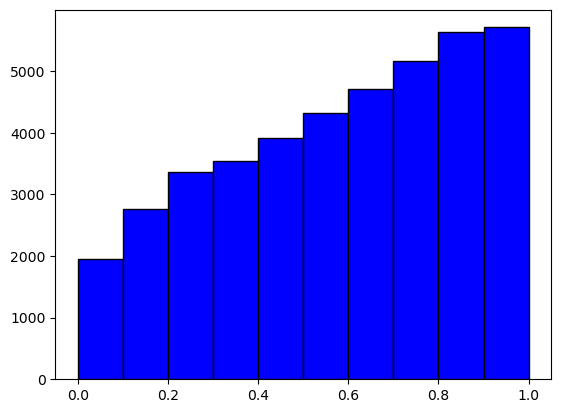

In [63]:
plt.hist(filtered_p, bins=10, color='blue', edgecolor='black')

MemoryError: Unable to allocate 12.6 GiB for an array with shape (41093, 41093) and data type float64